# Explore here

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

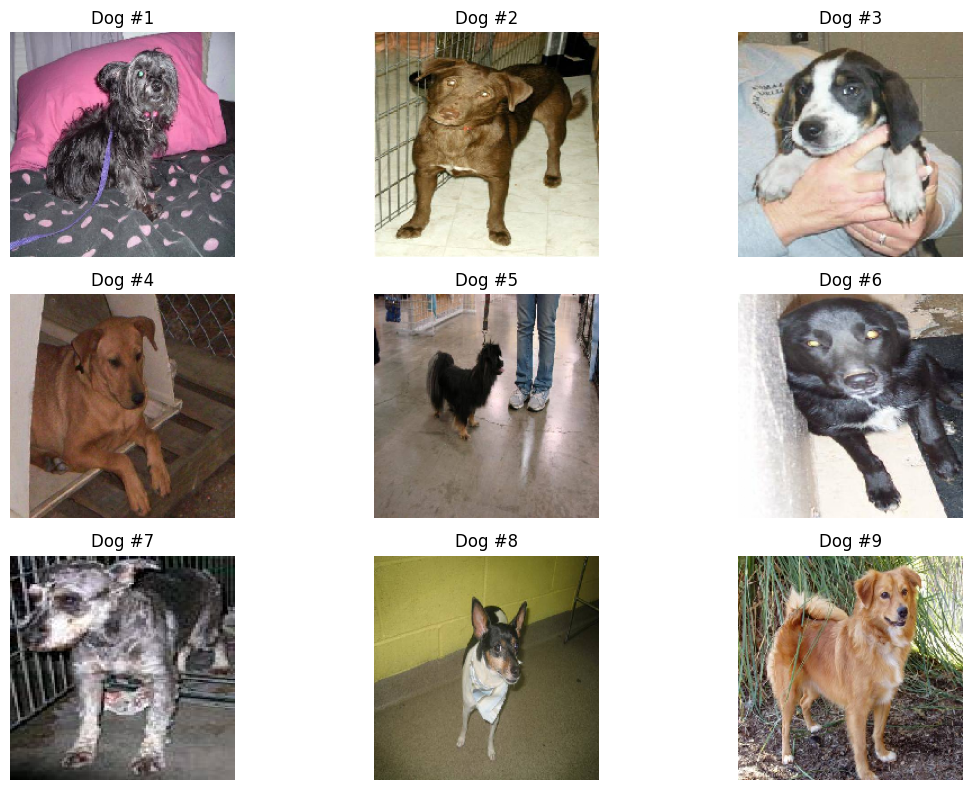

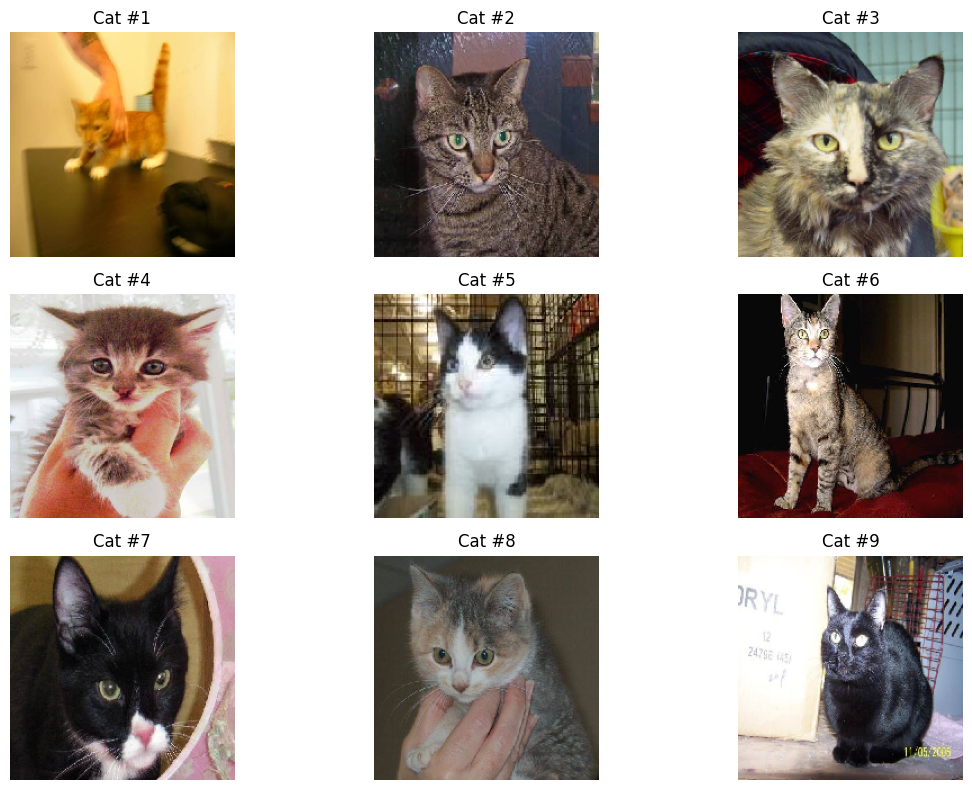

In [3]:

data_dir = "../data/raw/train"
dogs_path = "../data/raw/train/dogs"
cats_path = "../data/raw/train/cats"

dog_images_files = [f for f in os.listdir(dogs_path)]
cat_images_files = [f for f in os.listdir(cats_path)]

# Función para cargar imágenes
def load_images(image_files, folder_path, n=9, target_size=(200, 200)):
    images = []
    for i in range(n):
        img_path = os.path.join(folder_path, image_files[i])
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
    return images

dog_images = load_images(dog_images_files, dogs_path)
cat_images = load_images(cat_images_files, cats_path)

def show_images(images, title):
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"{title} #{i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(dog_images, "Dog")
show_images(cat_images, "Cat")


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_dir = "../data/raw/train"
test_dir = "../data/raw/test1"

trdata = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
)


test_filenames = os.listdir(test_dir)
df_test = pd.DataFrame({'filename': test_filenames})

tsdata = train_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=test_dir,
    x_col='filename',
    y_col=None,
    target_size=(200, 200),
    batch_size=32,
    class_mode=None,
    shuffle=False
)




Found 25000 images belonging to 2 classes.
Found 12500 validated image filenames.


In [5]:
model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

f:\Programming\venvs\conda\mi_entorno\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model

<Sequential name=sequential, built=True>

Solo se entrena una época por el tiempo que conlleva

In [ ]:
model.fit(trdata, epochs=1)

f:\Programming\venvs\conda\mi_entorno\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


433/782 ━━━━━━━━━━━━━━━━━━━━ 1:28:52 15s/step - accuracy: 0.4968 - loss: 0.6975

## Optimizando el modelo

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    filepath='../models/modelo.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='auto',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    mode='auto'
)

history = model.fit(
    trdata,
    epochs=3,
    steps_per_epoch=200,
    callbacks=[checkpoint, early_stop]
)


In [ ]:
import numpy as np

## Predicción

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/85.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/modelo.keras")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")